In [28]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim
from torch.utils.data import random_split
from torch.utils.data.sampler import SubsetRandomSampler
from torch.optim.lr_scheduler import StepLR

from sklearn.metrics import confusion_matrix

In [4]:
train_transform = [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
# valid_transform = [transforms.RandomCrop(28, padding=4),transforms.RandomHorizontalFlip(),
#                   transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]

train_transform=transforms.Compose(train_transform)
# valid_transform=transforms.Compose(valid_transform)

num_workers = 0
batch_size = 40
train_data = datasets.MNIST(root='data', train= True, download=True, transform=train_transform)
valid_data = datasets.MNIST(root='data', train= True, download=True, transform=train_transform)
test_data = datasets.MNIST(root='data', train= False, download=True, transform=train_transform)

In [5]:
num_train = len(train_data)
data_idx = list(range(num_train))
split_idx = int(num_train * 0.05)
train_idx, valid_idx = data_idx[split_idx:], data_idx[:split_idx]

In [6]:
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [7]:
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size= batch_size,
                                           sampler = train_sampler,
                                           num_workers= num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size= batch_size,
                                           sampler = valid_sampler,
                                           num_workers= num_workers)

test_loader = torch.utils.data.DataLoader(test_data, 
                                          batch_size = batch_size, 
                                          num_workers = num_workers)

In [8]:
dataiter = iter(train_loader)
img, lbl = dataiter.next()
img.shape

torch.Size([40, 1, 28, 28])

Displaying the validation data of a single batch


<ipython-input-9-d643939dd0d1>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 40/2, idx+1, xticks= [], yticks= [])


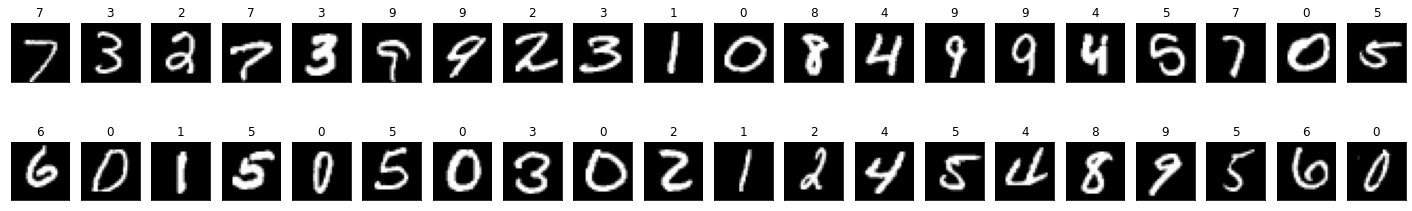

In [9]:
print('Displaying the validation data of a single batch')
images , labels = dataiter.next()
images = images.numpy()
fig = plt.figure(figsize= (25,4))
for idx in np.arange(40):
    ax = fig.add_subplot(2, 40/2, idx+1, xticks= [], yticks= [])
    ax.imshow(np.squeeze(images[idx]),cmap = 'gray')
    ax.set_title(str(labels[idx].item()))
    

In [10]:
a = {}
dataiter = iter(valid_loader)
for img,lbl in dataiter:
    for i in lbl:
        i = int(i)
        if i == 0 and i not in a:
            a[int(lbl[i])] = img[i]
        elif i == 1 and i not in a:
            a[int(lbl[i])] = img[i]
        elif i == 2 and i not in a:
            a[int(lbl[i])] = img[i]
        elif i == 3 and i not in a:
            a[int(lbl[i])] = img[i]
        elif i == 4 and i not in a:
            a[int(lbl[i])] = img[i]
        elif i == 5 and i not in a:
            a[int(lbl[i])] = img[i]
        elif i == 6 and i not in a:
            a[int(lbl[i])] = img[i]
        elif i == 7 and i not in a:
            a[int(lbl[i])] = img[i]
        elif i == 8 and i not in a:
            a[int(lbl[i])] = img[i]
        elif i == 9 and i not in a:
            a[int(lbl[i])] = img[i]
    if len(a) == 11:
            break; 

Displaying the validation data of a single batch


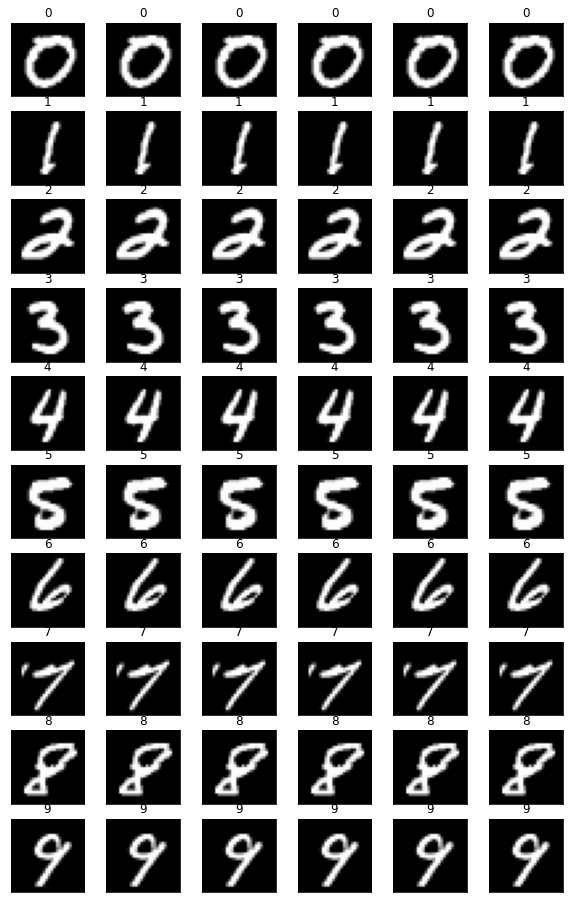

In [11]:
print('Displaying the validation data of a single batch')
fig = plt.figure(figsize= (10,16))
count=1 
for digit in range(10):
    plot_complete = False
    for num_digit in range(6):
        ax = fig.add_subplot(10, 6, count, xticks= [], yticks= [])
        ax.imshow(np.squeeze(a[digit]),cmap = 'gray')
        ax.set_title(str(digit))
        count+=1

tensor(2)


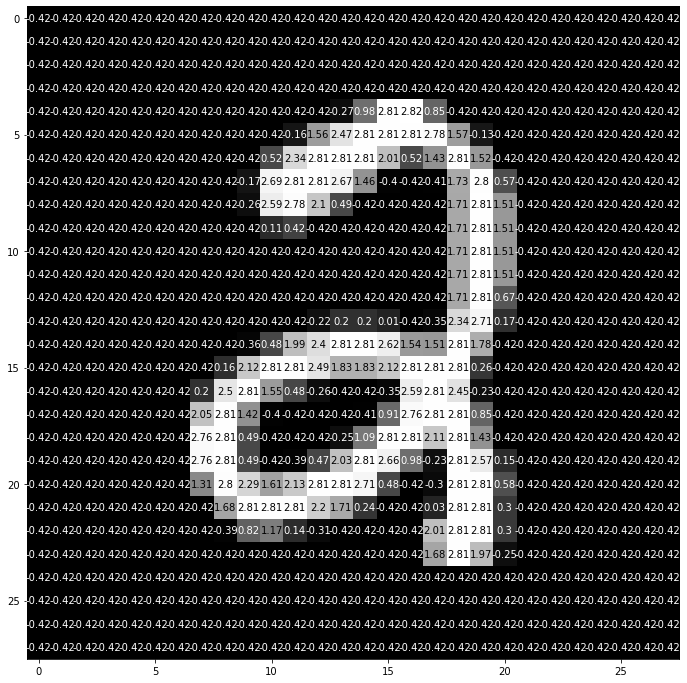

In [12]:
img = np.squeeze(images[2])
print(labels[2])
fig = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width , height = img.shape
thresh = img.max()/ 2.5
for x in range(width):
    for y in range (height):
        val = round(img[x][y],2 ) if img[x][y] != 0 else 0
        ax.annotate(str(val),xy = (y,x),
                    horizontalalignment= 'center',
                    verticalalignment = 'center',
                    color = 'white' if img[x][y] < thresh else 'black'
                   )

In [13]:
# Declaring a neural network

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.2)
    def forward(self, x):
        x = F.relu(self.fc1(x.view(batch_size,28*28)))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        return x
model = Net()
model.parameters

<bound method Module.parameters of Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)>

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [15]:
def validate_training():
    model.eval()
    valid_loss = 0.0    
    for data, target in valid_loader:
        output = model(data)
        loss = criterion(output, target)
        valid_loss += loss.item() * data.size(0)
    valid_loss = valid_loss / (len(valid_loader) * batch_size)
    print("Epoch {} : Validation loss : {:.6f}".format(epoch+1, valid_loss))
    return valid_loss

In [16]:
per_epoch_loss = []
validation_error = []
epochs = 20
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    train_loss = train_loss / len(train_loader.dataset)
    print("Epoch {} : Training loss : {:.6f}".format(epoch+1, train_loss))
    per_epoch_loss.append(train_loss)
    validation_error.append(validate_training())

Epoch 1 : Training loss : 1.339391
Epoch 1 : Validation loss : 0.762435
Epoch 2 : Training loss : 0.596119
Epoch 2 : Validation loss : 0.490110
Epoch 3 : Training loss : 0.452238
Epoch 3 : Validation loss : 0.407378
Epoch 4 : Training loss : 0.394916
Epoch 4 : Validation loss : 0.365072
Epoch 5 : Training loss : 0.361675
Epoch 5 : Validation loss : 0.338355
Epoch 6 : Training loss : 0.339785
Epoch 6 : Validation loss : 0.320413
Epoch 7 : Training loss : 0.322083
Epoch 7 : Validation loss : 0.305095
Epoch 8 : Training loss : 0.308826
Epoch 8 : Validation loss : 0.292636
Epoch 9 : Training loss : 0.296393
Epoch 9 : Validation loss : 0.282774
Epoch 10 : Training loss : 0.285992
Epoch 10 : Validation loss : 0.273622
Epoch 11 : Training loss : 0.275456
Epoch 11 : Validation loss : 0.265252
Epoch 12 : Training loss : 0.267524
Epoch 12 : Validation loss : 0.257585
Epoch 13 : Training loss : 0.259493
Epoch 13 : Validation loss : 0.250609
Epoch 14 : Training loss : 0.253011
Epoch 14 : Validatio

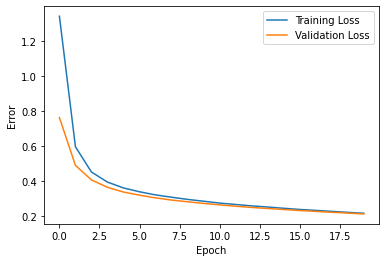

In [17]:
plt.plot(np.arange(20), per_epoch_loss, label='Training Loss')
plt.plot(np.arange(20), validation_error, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

In [18]:
test_loss = 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()

for data, target in test_loader:
    output = model(data)
    loss = criterion(output,target)
    test_loss += loss.item()*data.size(0)
    _, preds = torch.max(output, 1)
    correct = np.squeeze(preds.eq(target.data.view_as(preds)))
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
test_loss = test_loss/len(test_loader.dataset)
print("Test loss : {:.6f}\n".format(test_loss))

Test loss : 0.208873



In [19]:
for i in range(10):
    print('Test accuracy of %5s : %2d%% (%2d / %2d )' % ( str(i), 100. * class_correct[i] / class_total[i], 
          np.sum(class_correct[i]), np.sum(class_total[i])))
print("Total accuracy : %2d%% (%2d / %2d)" % (100. *np.sum(class_correct) / np.sum(class_total) , 
                                              np.sum(class_correct), np.sum(class_total)))

Test accuracy of     0 : 98% (966 / 980 )
Test accuracy of     1 : 97% (1111 / 1135 )
Test accuracy of     2 : 92% (953 / 1032 )
Test accuracy of     3 : 91% (929 / 1010 )
Test accuracy of     4 : 94% (932 / 982 )
Test accuracy of     5 : 91% (812 / 892 )
Test accuracy of     6 : 95% (919 / 958 )
Test accuracy of     7 : 92% (956 / 1028 )
Test accuracy of     8 : 91% (890 / 974 )
Test accuracy of     9 : 92% (933 / 1009 )
Total accuracy : 94% (9401 / 10000)


In [25]:
dataiter = iter(test_loader)

<ipython-input-27-dc495100ef56>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks = [], yticks = [])


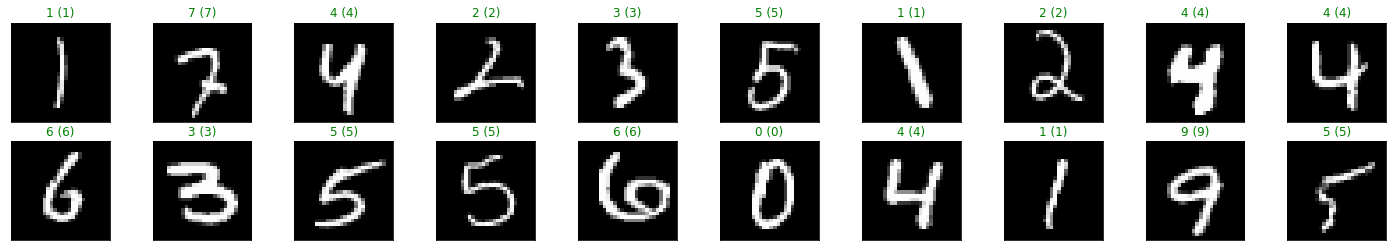

In [27]:
images, labels = dataiter.next()
output = model(images)
_, preds = torch.max(output, 1)
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), 
                 color= ("green" if preds[idx] == labels[idx] else "red"))